In [1]:
from utils import *

# Respondents statistics and visualizations

**Load data.**

In [2]:
respondents = pd.read_csv("../data/respondents.csv", index_col=0)

In [3]:
respondents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 140
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   respondent                120 non-null    int64  
 1   identifier                0 non-null      float64
 2   status                    120 non-null    object 
 3   included                  120 non-null    bool   
 4   started_at                120 non-null    object 
 5   ip                        0 non-null      float64
 6   device                    120 non-null    object 
 7   os                        120 non-null    object 
 8   browser                   120 non-null    object 
 9   location                  120 non-null    object 
 10  time_taken                120 non-null    float64
 11  questions_answered        120 non-null    object 
 12  tasks_completed           120 non-null    object 
 13  tasks_skipped             120 non-null    object 
 14  vmt_levels

In [4]:
respondents.head()

,respondent,identifier,status,included,started_at,ip,device,os,browser,location,...,gender,education,income,web_browsing,web_skill,att_check_1,similar_studies,note,att_check_2,interval
0,3,NaN,completed,True,2022-09-30 14:21:47,NaN,desktop,Windows,Edge,GB,...,Woman,Undergraduate degree,"£10,000 - £19,999",Few times a day,3.0,Salad,"Yes, I've done studies where I've completed a ...",NaN,30.0,2s
1,4,NaN,completed,True,2022-09-30 14:22:50,NaN,desktop,OS X,Safari,GB,...,Man,Graduate degree,"£30,000 - £39,999",Most of the day,5.0,Salad,NaN,NaN,30.0,2s
2,5,NaN,completed,True,2022-09-30 14:26:56,NaN,desktop,Windows,Chrome,GB,...,Man,Technical/community college,"£20,000 - £29,999",Few times a day,5.0,Salad,yes but not the same,no thanks,30.0,2s
4,7,NaN,completed,True,2022-10-06 12:51:06,NaN,desktop,OS X,Chrome,GB,...,Woman,Technical/community college,"£10,000 - £19,999",Most of the day,4.0,Salad,I don't think so.,NaN,30.0,2s
5,8,NaN,completed,True,2022-10-06 12:57:21,NaN,desktop,Windows,Chrome,GB,...,Woman,Undergraduate degree,"£0 - £10,000",Most of the day,3.0,Salad,No,No,30.0,2s


**Filter test runs.**

In [5]:
respondents = respondents[(respondents.status == 'completed')]

In [6]:
respondents.shape

(120, 39)

**No. of repondents in each group.**

In [7]:
respondents.groupby(['interval']).count().respondent

interval
10s    40
2s     40
5s     40
Name: respondent, dtype: int64

## Demographics and attributes

**Gender**

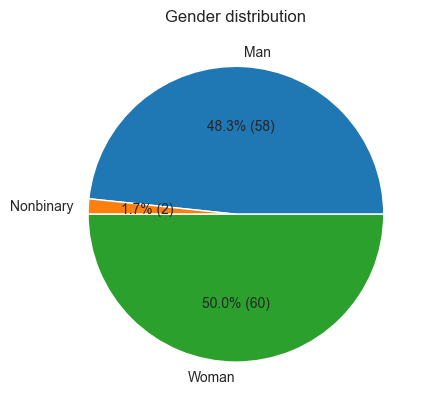

In [8]:
my_pie(respondents, 'gender', 'Gender distribution')

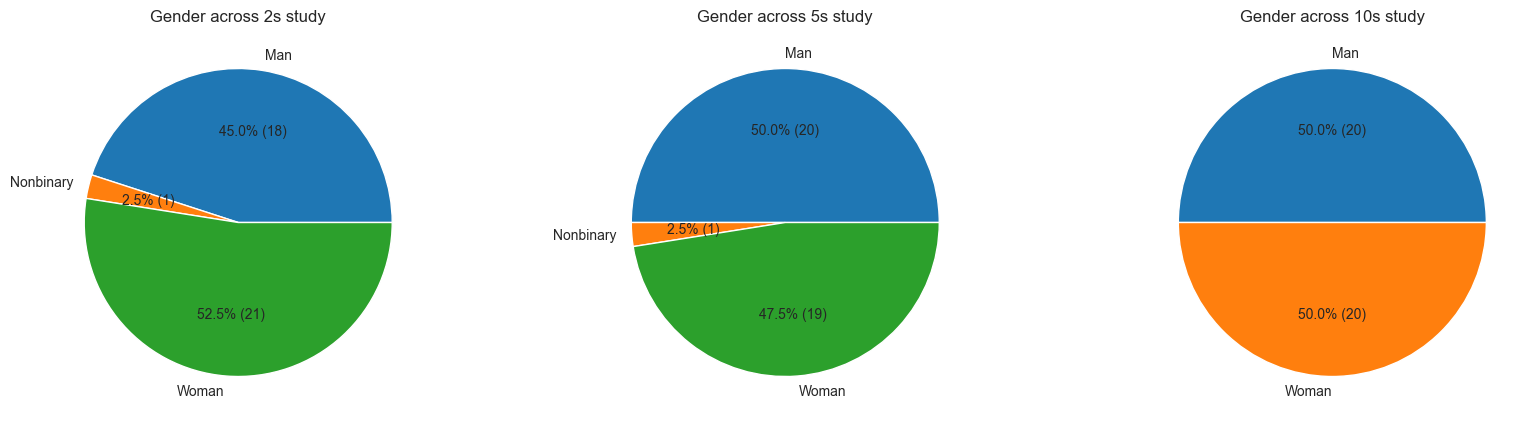

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_pie(respondents[respondents.interval == '2s'], 'gender', 'Gender across 2s study', ax1)
my_pie(respondents[respondents.interval == '5s'], 'gender', 'Gender across 5s study', ax2)
my_pie(respondents[respondents.interval == '10s'], 'gender', 'Gender across 10s study', ax3)

**Age.**

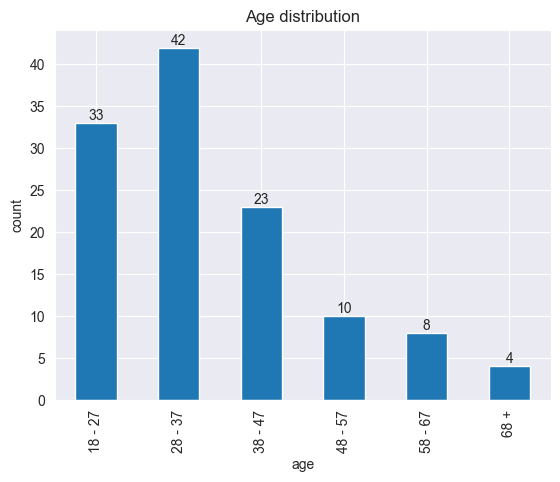

In [10]:
my_bar(respondents, 'age', 'Age distribution')

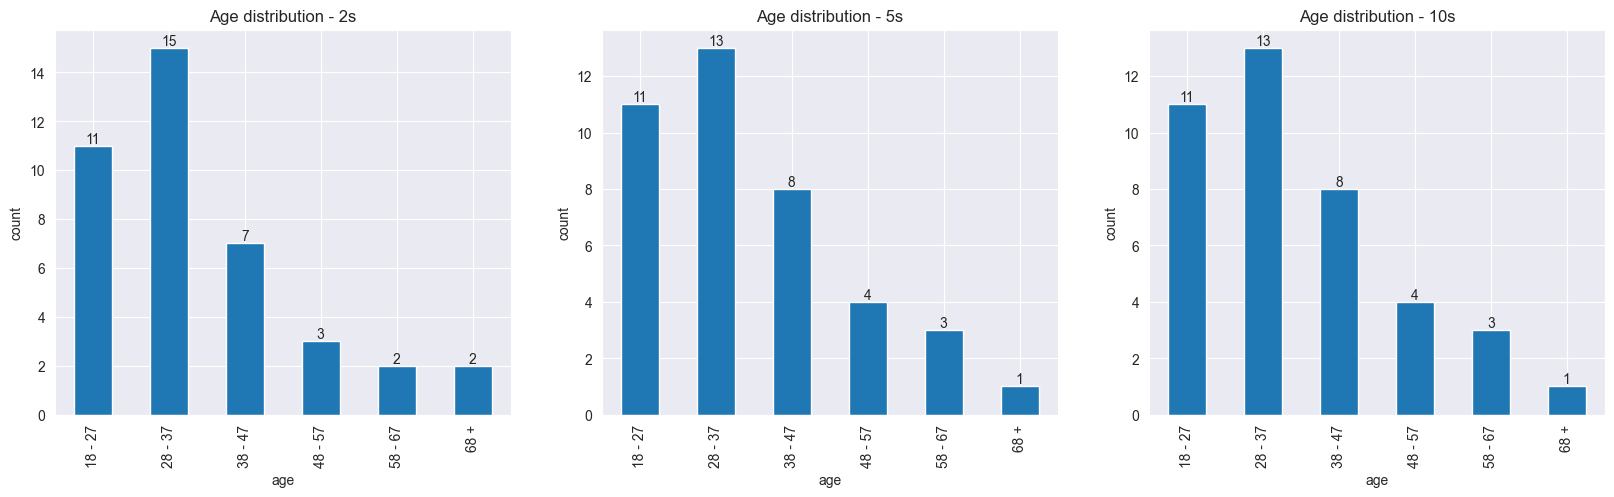

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 5))
my_bar(respondents[respondents.interval == '2s'], 'age', 'Age distribution - 2s', ax=ax1)
my_bar(respondents[respondents.interval == '5s'], 'age', 'Age distribution - 5s', ax=ax2)
my_bar(respondents[respondents.interval == '5s'], 'age', 'Age distribution - 10s', ax=ax3)

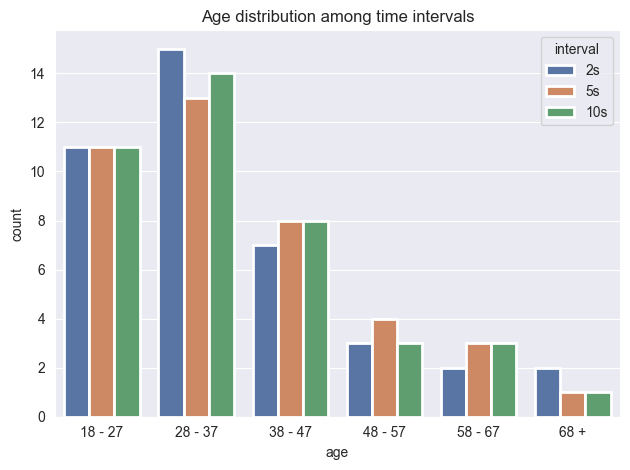

In [12]:
my_bar_grouped(respondents, 'age', 'interval', 'Age distribution among time intervals', ['2s', '5s', '10s'])

[Text(0.5, 0, "Participant's age [years]"),
 Text(0, 0.5, 'Number of participants')]

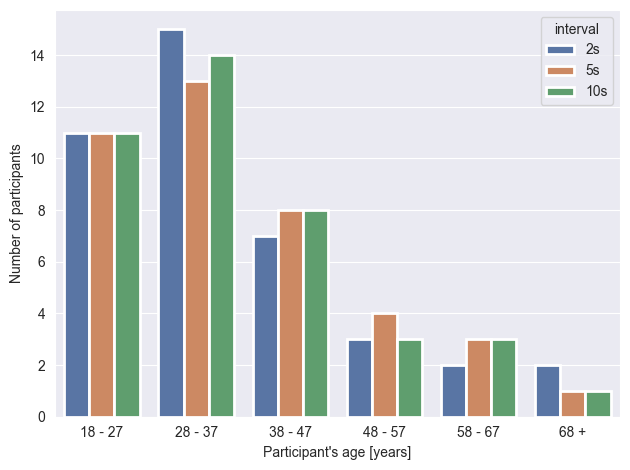

In [13]:
plt.figure(tight_layout=True)
sns.barplot(
    data=respondents.groupby(['age', 'interval']).size().reset_index(), 
    y=0,
    x='age',
    hue='interval',
    palette='deep',
    linewidth=2,
    hue_order = ['2s', '5s', '10s']
).set(xlabel='Participant\'s age [years]', ylabel='Number of participants')

**Other demographics**

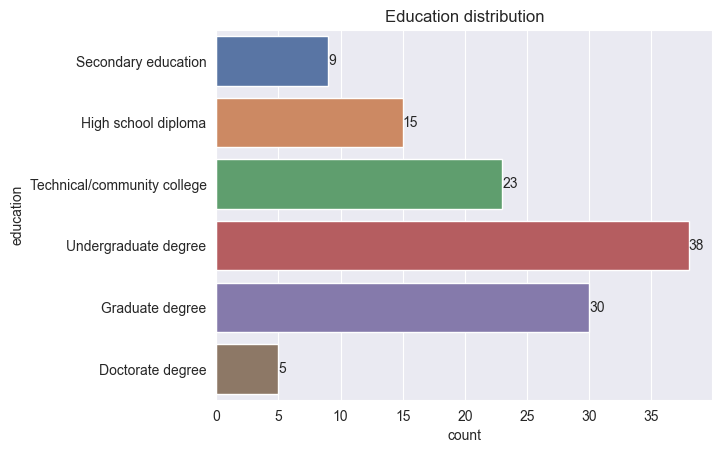

In [14]:
my_count(respondents, 'education', 'Education distribution', None, ['Secondary education', 'High school diploma', 'Technical/community college', 'Undergraduate degree', 'Graduate degree', 'Doctorate degree'])

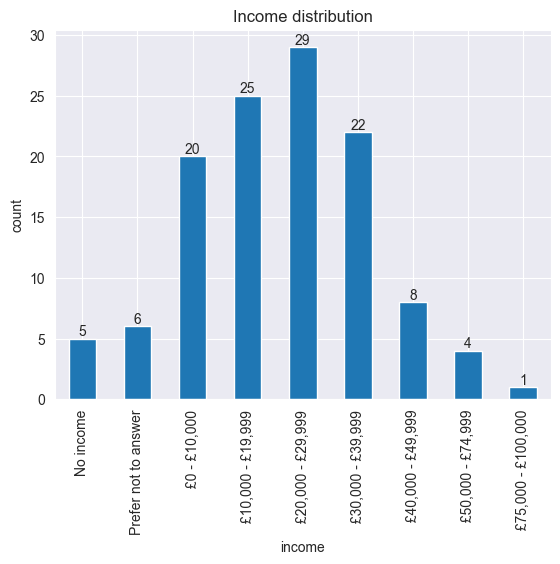

In [15]:
my_bar(respondents, 'income', 'Income distribution')

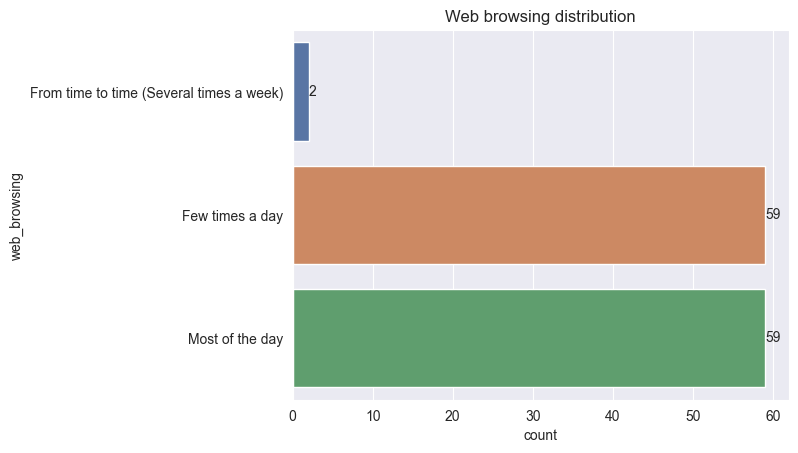

In [16]:
my_count(respondents, 'web_browsing', 'Web browsing distribution', None, ['From time to time (Several times a week)', 'Few times a day', 'Most of the day'])

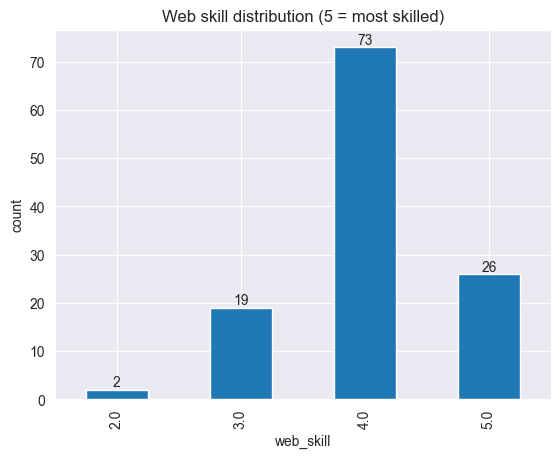

In [17]:
my_bar(respondents, 'web_skill', 'Web skill distribution (5 = most skilled)')

**Other attributes.**

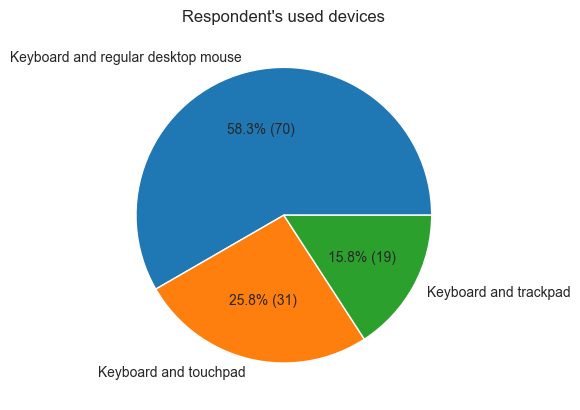

In [18]:
my_pie(respondents, 'input_device', 'Respondent\'s used devices')

In [19]:
respondents.columns

Index(['respondent', 'identifier', 'status', 'included', 'started_at', 'ip',
       'device', 'os', 'browser', 'location', 'time_taken',
       'questions_answered', 'tasks_completed', 'tasks_skipped', 'vmt_levels',
       'vmt_levels_group', 'vmt_click_speed', 'vmt_click_speed_group',
       'vmt_press_len', 'vmt_press_len_group', 'pst_levels',
       'pst_levels_group', 'pst_mistakes', 'pst_mistakes_group',
       'pst_levels_correct', 'pst_levels_correct_group', 'pst_press_speed',
       'input_device', 'age', 'gender', 'education', 'income', 'web_browsing',
       'web_skill', 'att_check_1', 'similar_studies', 'note', 'att_check_2',
       'interval'],
      dtype='object')

In [20]:
respondents.groupby(['att_check_1']).count().respondent

att_check_1
Salad    120
Name: respondent, dtype: int64

In [21]:
respondents.groupby(['att_check_2']).count().respondent

att_check_2
12.0      4
30.0    116
Name: respondent, dtype: int64

In [22]:
respondents.groupby(['device']).count().respondent

device
desktop    120
Name: respondent, dtype: int64

In [23]:
respondents.groupby(['os']).count().respondent

os
Chrome OS     1
OS X         22
Windows      97
Name: respondent, dtype: int64

In [24]:
respondents.groupby(['browser']).count().respondent

browser
Chrome     84
Edge       16
Firefox     8
Opera       2
Safari     10
Name: respondent, dtype: int64

In [25]:
respondents.groupby(['location']).count().respondent

location
GB    118
IL      1
US      1
Name: respondent, dtype: int64

In [26]:
respondents.groupby(['status']).count().respondent

status
completed    120
Name: respondent, dtype: int64

**Average times**

In [27]:
respondents.groupby('interval').mean().time_taken

C:\Users\mkrajcovic\AppData\Local\Temp\ipykernel_14460\1213167059.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  respondents.groupby('interval').mean().time_taken


interval
10s    23.675
2s     22.575
5s     23.075
Name: time_taken, dtype: float64

**Respondents that did not pass attention check.**

In [28]:
respondents[respondents.att_check_2 != 30]

,respondent,identifier,status,included,started_at,ip,device,os,browser,location,...,gender,education,income,web_browsing,web_skill,att_check_1,similar_studies,note,att_check_2,interval
23,26,NaN,completed,True,2022-10-07 15:13:02,NaN,desktop,Windows,Chrome,GB,...,Woman,Technical/community college,"£0 - £10,000",Most of the day,4.0,Salad,yes,no,12.0,2s
44,47,NaN,completed,True,2022-10-13 08:41:38,NaN,desktop,Windows,Opera,GB,...,Woman,Technical/community college,"£10,000 - £19,999",Few times a day,4.0,Salad,NaN,I think 2 seconds its far too less to remember...,12.0,2s
54,7,NaN,completed,True,2022-10-06 13:26:37,NaN,desktop,Windows,Edge,GB,...,Man,Undergraduate degree,No income,Most of the day,4.0,Salad,no,NaN,12.0,5s
135,42,NaN,completed,True,2022-10-13 09:12:53,NaN,desktop,OS X,Safari,GB,...,Woman,Graduate degree,"£50,000 - £74,999",Few times a day,4.0,Salad,No,NaN,12.0,10s


## Cognitive tasks

In [29]:
respondents[['time_taken', 'vmt_levels', 'vmt_click_speed', 'vmt_press_len', 'pst_levels', 'pst_levels_correct', 'pst_mistakes', 'pst_press_speed']].describe()

,time_taken,vmt_levels,vmt_click_speed,vmt_press_len,pst_levels,pst_levels_correct,pst_mistakes,pst_press_speed
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,23.108333,6.558333,1.574852,103.193656,33.850000,31.325000,2.525000,0.371470
std,7.481962,1.549171,0.509226,50.491864,8.023757,7.144561,5.974684,0.120392
min,12.000000,3.000000,0.509587,2.193548,17.000000,12.000000,0.000000,0.064202
25%,18.000000,6.000000,1.283377,77.986715,28.750000,27.000000,1.000000,0.310126
50%,21.000000,6.000000,1.554519,95.708232,34.000000,32.000000,1.000000,0.365228
75%,26.000000,7.250000,1.864951,122.375815,39.000000,36.000000,3.000000,0.423952
max,54.000000,12.000000,3.400143,282.750000,71.000000,48.000000,56.000000,1.315716


**Time taken.**

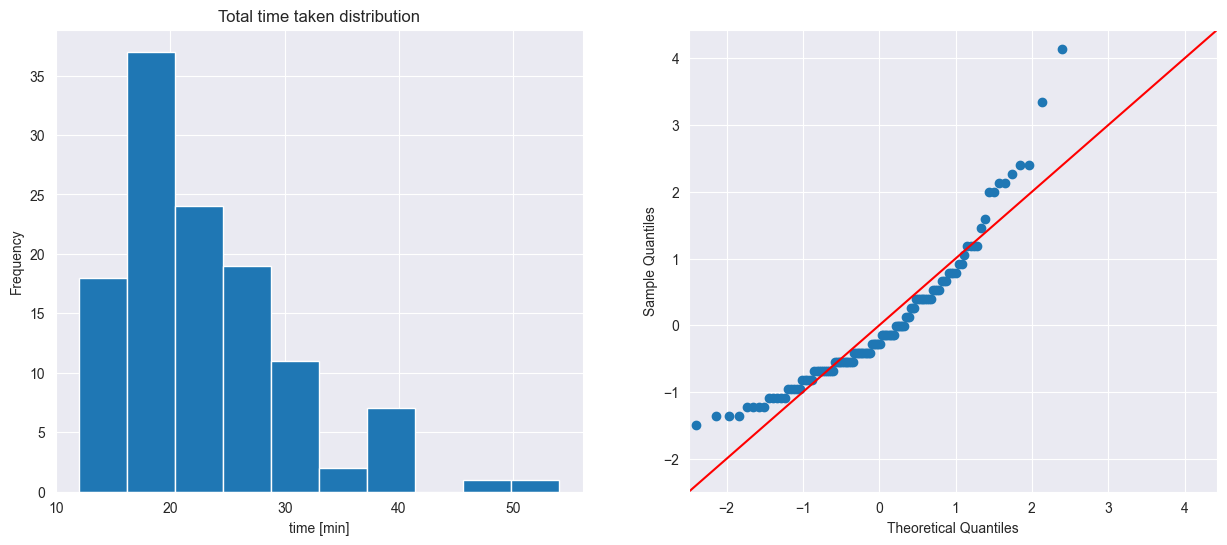

In [30]:
my_hist_with_qq(respondents, 'time_taken', 'Total time taken distribution', 'time [min]')

**Visual memory task.**

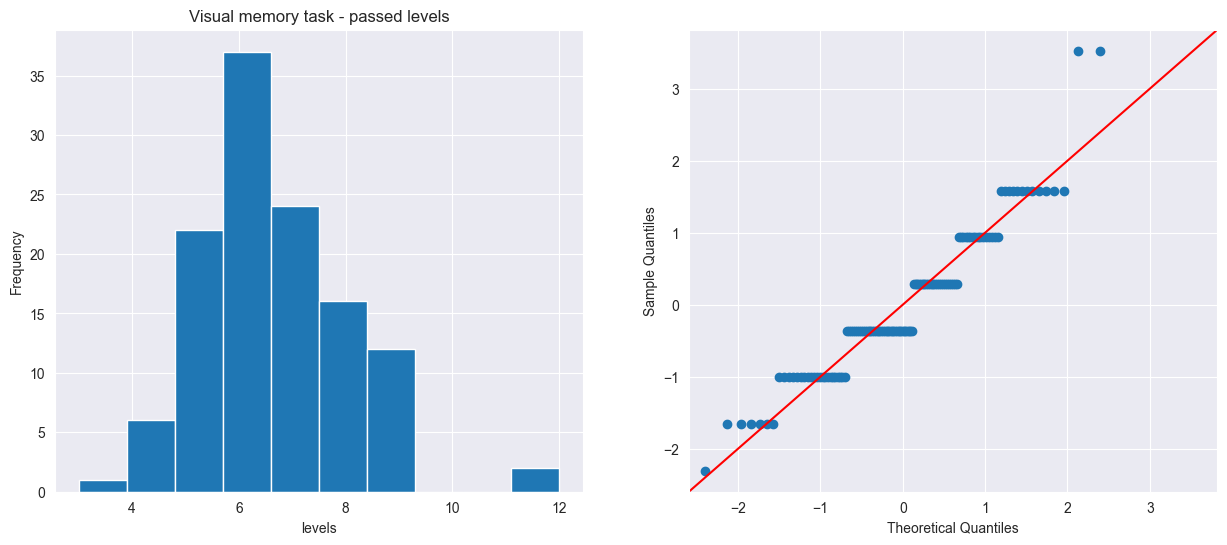

In [31]:
my_hist_with_qq(respondents, 'vmt_levels', 'Visual memory task - passed levels', 'levels')

In [32]:
stats.shapiro(respondents.vmt_levels.sample(30, random_state=0))

ShapiroResult(statistic=0.9160266518592834, pvalue=0.021180985495448112)

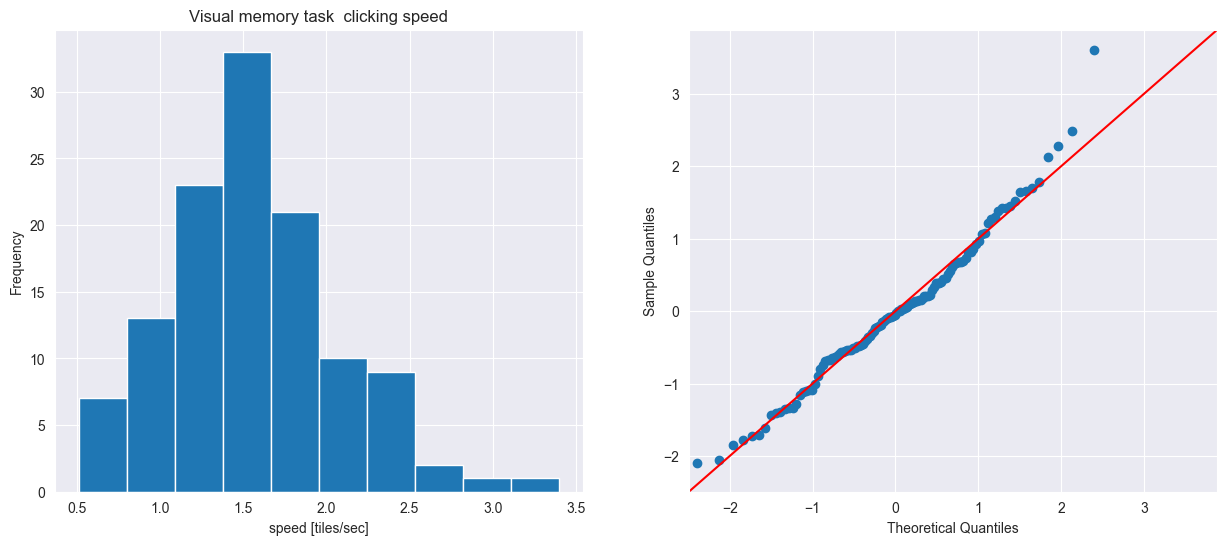

In [33]:
my_hist_with_qq(respondents, 'vmt_click_speed', 'Visual memory task  clicking speed', 'speed [tiles/sec]')

In [34]:
stats.shapiro(respondents.vmt_click_speed.sample(50, random_state=0))

ShapiroResult(statistic=0.9783573150634766, pvalue=0.4849560558795929)

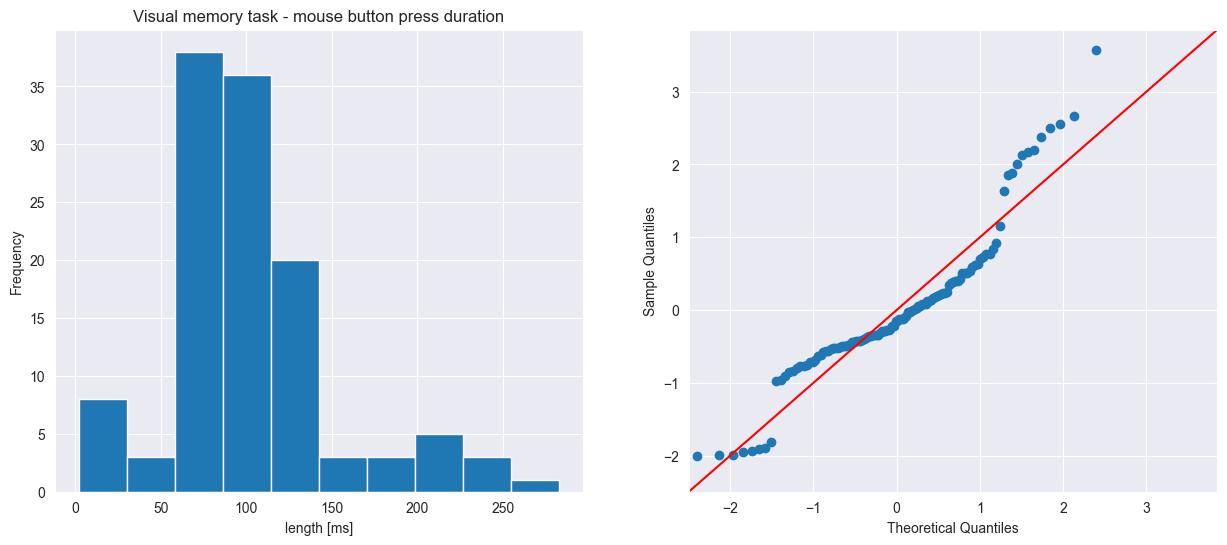

In [35]:
my_hist_with_qq(respondents, 'vmt_press_len', 'Visual memory task - mouse button press duration', 'length [ms]')

In [36]:
stats.shapiro(respondents.vmt_press_len.sample(50, random_state=0))

ShapiroResult(statistic=0.92270427942276, pvalue=0.0029571650084108114)

**Perceptual speed task.**

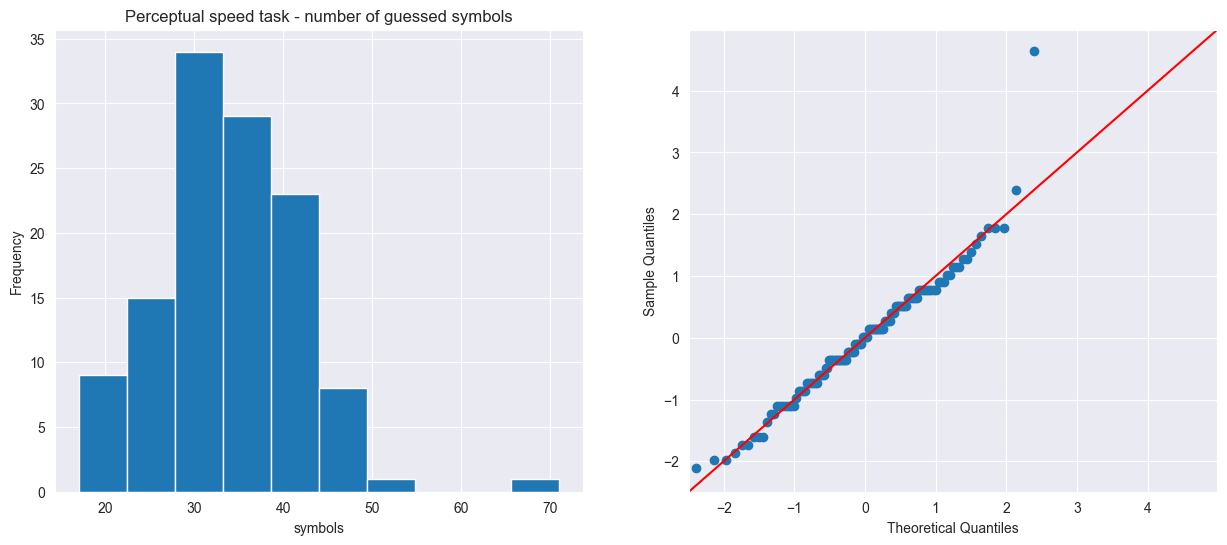

In [37]:
my_hist_with_qq(respondents, 'pst_levels', 'Perceptual speed task - number of guessed symbols', 'symbols')

In [38]:
stats.shapiro(respondents.pst_levels.sample(50, random_state=0))

ShapiroResult(statistic=0.9844281673431396, pvalue=0.746768593788147)

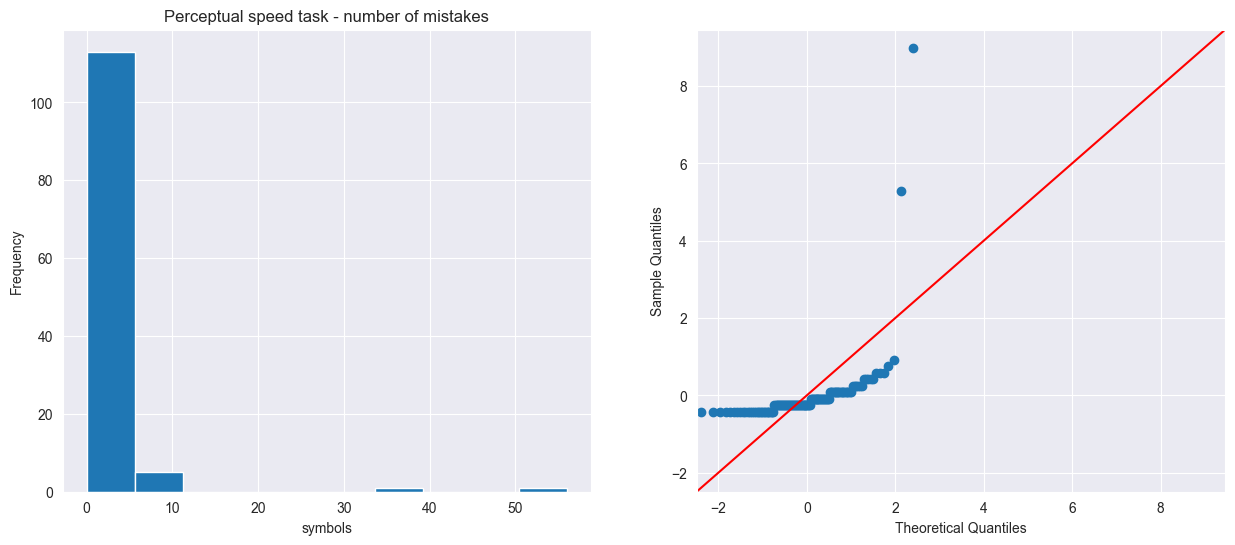

In [39]:
my_hist_with_qq(respondents, 'pst_mistakes', 'Perceptual speed task - number of mistakes', 'symbols')

In [40]:
stats.shapiro(respondents.pst_mistakes.sample(50, random_state=0))

ShapiroResult(statistic=0.8592389225959778, pvalue=2.7788099032477476e-05)

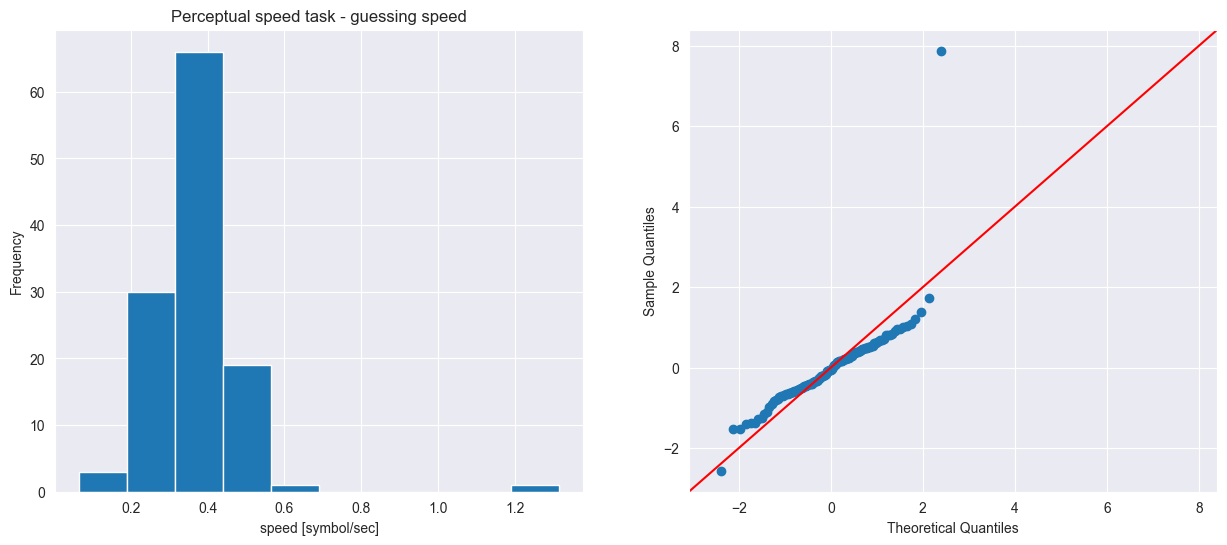

In [41]:
my_hist_with_qq(respondents, 'pst_press_speed', 'Perceptual speed task - guessing speed', 'speed [symbol/sec]')

In [42]:
stats.shapiro(respondents.pst_press_speed.sample(50, random_state=0))

ShapiroResult(statistic=0.9578916430473328, pvalue=0.0725373923778534)

## Similar studies and notes

In [43]:
for index, row in respondents.iterrows():
    if(row.note not in ['No', 'no', 'nan', np.nan, 'No.', 'no\n', 'nope', 'Nope', 'no thanks', 'No. ']):
        print(row.interval)
        print(row.note)

2s
i did enjoyed the study and the challenge of game and memories recall
2s
It was a good one.
2s
thank you for allowing me to participate
2s
2 secs is not long enough to recall much 
2s
Did my best - 2 seconds is really not long!
2s
2 seconds was a very short time to take in the deatils 
2s
The images flashed past very quickly
2s
I spent too long trying to find the name of the company
2s
I think 2 seconds its far too less to remember as much as possible from the pages/ websites.
2s
No, thank you
5s
interesting study
5s
interesting study
5s
This style of study was much more fun and engaging than other studies I have taken part in. I particularly enjoyed the memory games and the pairing.
5s
enjoyed this very much
5s
Really enjoyed it-ten seconds would have been kinder!! Thanks
5s
Interesting
5s
No, just thank you for the survey and hope my answers were helpful
5s
I'd be keen on doing more Ux testing in this style
5s
it was very difficult to really judge the web sites on 5 seconds
5s
Not

In [44]:
for index, row in respondents.iterrows():
    if(row.similar_studies not in ['No', 'no', 'nan', np.nan, 'No.', 'no\n', 'nope', 'Nope', 'no thanks', 'No. ']):
        print(row.interval)
        print(row.similar_studies)

2s
Yes, I've done studies where I've completed a task and answered questions. However, this is one is unique - I've not done a study about looking at websites and then answering questions.
2s
yes but not the same
2s
I don't think so.
2s
I think I participated, but it was more than 3 months. Therefore, I could not remember the details. 
2s
Yes, however, the topic was different.
2s
yes other studies on Prolific
2s
yes, several studies which involved focus tasks and then evaluations of different products 
2s
yes. They were memory or skill task but I never realised the purpose but for this one I did
2s
yes
2s
Taken part in memory studies but nothing similar to this
2s
Yes but not in terms of looking at a picture and then answering questions. More like here is a graph (keep looking at it) what does the graph tell us.
2s
Yes memory studies similar to the one where i had to remember the sequence of different coloured blocks
2s
No 
2s
no.
2s
I can't remember. I don't think so.
2s
no I have not